<a href="https://colab.research.google.com/github/Mheshimiwaa/AI-tools/blob/main/Scikit_Learn_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# TASK 1: IRIS DATASET - CLASSICAL ML WITH SCIKIT-LEARN
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
import matplotlib.pyplot as plt

In [ ]:
# STEP 1: LOAD AND EXPLORE THE DATA
print("LOADING IRIS DATASET...")

# Load the built-in iris dataset
iris = load_iris()
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y = iris.target  # Target (species: 0=setosa, 1=versicolor, 2=virginica)

# Create a DataFrame for better visualization
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['species'] = y

print(" DATASET SHAPE:", X.shape)
print(" TARGET NAMES:", iris.target_names)
print("\n FIRST 5 ROWS:")
print(iris_df.head())

LOADING IRIS DATASET...
 DATASET SHAPE: (150, 4)
 TARGET NAMES: ['setosa' 'versicolor' 'virginica']

 FIRST 5 ROWS:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [ ]:
# STEP 2: DATA PREPROCESSING
print("CHECKING FOR MISSING VALUES...")
print("Missing values in features:", np.isnan(X).sum())
print("Missing values in target:", np.isnan(y).sum())

print("\n No missing values found! Data is clean.")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f" Training set size: {X_train.shape[0]} samples")
print(f" Testing set size: {X_test.shape[0]} samples")

CHECKING FOR MISSING VALUES...
Missing values in features: 0
Missing values in target: 0

 No missing values found! Data is clean.
 Training set size: 120 samples
 Testing set size: 30 samples


In [ ]:
# STEP 3: TRAIN DECISION TREE CLASSIFIER
print(" TRAINING DECISION TREE MODEL...")

# Create and train the model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

print(" Model training completed!")
print(f" Model depth: {dt_classifier.get_depth()}")
print(f" Number of leaves: {dt_classifier.get_n_leaves()}")

 TRAINING DECISION TREE MODEL...
 Model training completed!
 Model depth: 6
 Number of leaves: 10


In [ ]:
# STEP 4: MAKE PREDICTIONS AND EVALUATE
print("MAKING PREDICTIONS ON TEST DATA...")

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"ACCURACY: {accuracy:.4f}")
print(f"PRECISION: {precision:.4f}")
print(f"RECALL: {recall:.4f}")

print("\nDETAILED CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

MAKING PREDICTIONS ON TEST DATA...
ACCURACY: 1.0000
PRECISION: 1.0000
RECALL: 1.0000

DETAILED CLASSIFICATION REPORT:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



VISUALIZING MODEL PERFORMANCE...


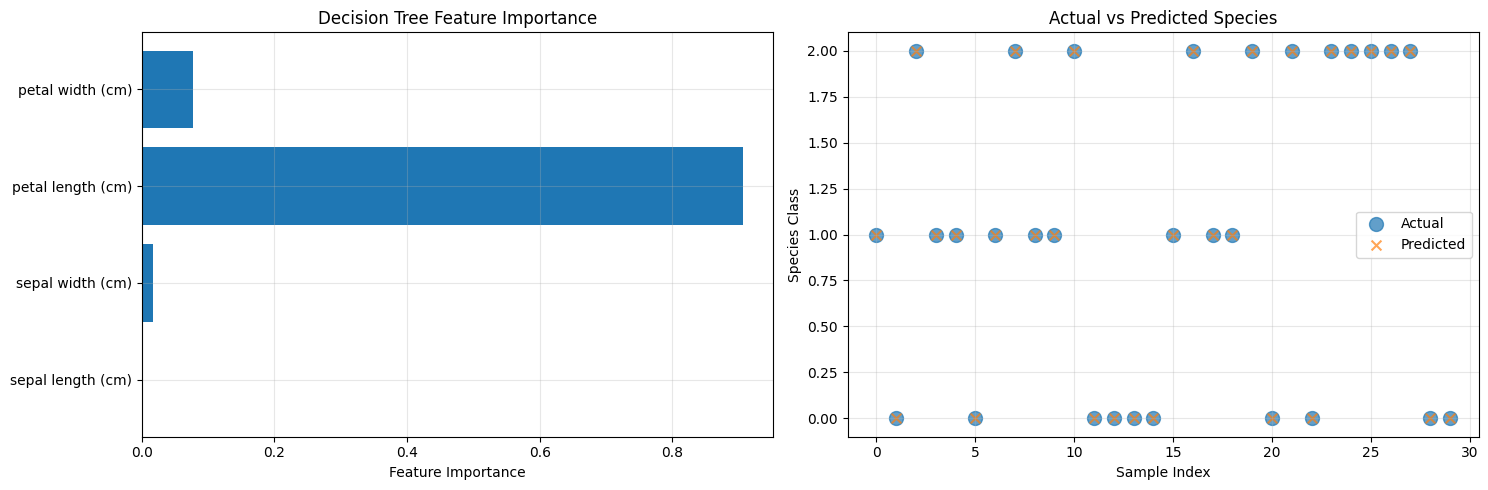

FEATURE IMPORTANCE ANALYSIS:
  sepal length (cm): 0.0000
  sepal width (cm): 0.0167
  petal length (cm): 0.9061
  petal width (cm): 0.0772


In [ ]:
# STEP 5: VISUALIZE RESULTS
print("VISUALIZING MODEL PERFORMANCE...")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Feature importance
feature_importance = dt_classifier.feature_importances_
features = iris.feature_names
y_pos = np.arange(len(features))

axes[0].barh(y_pos, feature_importance, align='center')
axes[0].set_yticks(y_pos)
axes[0].set_yticklabels(features)
axes[0].set_xlabel('Feature Importance')
axes[0].set_title('Decision Tree Feature Importance')
axes[0].grid(True, alpha=0.3)

# Plot 2: Actual vs Predicted
axes[1].scatter(range(len(y_test)), y_test, alpha=0.7, label='Actual', s=100)
axes[1].scatter(range(len(y_test)), y_pred, alpha=0.7, label='Predicted', s=50, marker='x')
axes[1].set_xlabel('Sample Index')
axes[1].set_ylabel('Species Class')
axes[1].set_title('Actual vs Predicted Species')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("FEATURE IMPORTANCE ANALYSIS:")
for feature, importance in zip(features, feature_importance):
    print(f"  {feature}: {importance:.4f}")